In [ ]:
# Team Members:
# Uday Narayan,2115200031, VIth
#Saumya Nigam,2115200024, VIth
#Oshin,2115200016, VIth

#Shailender Kumar,2115200025, VIth

### Data Import 

In [1]:
import pandas as pd
import numpy as np

# Import the CSV file and assigned it in to a Data Frame
Df_dataset = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
# Df_dataset.dropna(axis = 0, inplace = True)
Df_dataset



,Index,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,Initmates,Intimate,Intimates,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,4,General,Dresses,Dresses,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,0,General Petite,Dresses,Dresses,1
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,0,General Petite,Tops,Knits,1
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,1,General Petite,Dresses,Dresses,0
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,2,General,Dresses,Dresses,1


### Create a graph for illustrate the data distribution between 1 and 0. To identify the bias of the data

In [ ]:
import matplotlib.pyplot as plt

def createGraph(df_chart):
    
    #get the 1 and 0s
    reclist =  df_chart['Recommended IND'].tolist()
    
    #label the 1 and 0s
    labels = ['1', '0']
    
    #get the number of 1 and 0s
    count1 = reclist.count(1)
    count0 = reclist.count(0)
    print('total 1',str(count1 +count0 ))
    print('1s count : ',count1,' 0s count : ',count0)
    
    #get the sizes to a array
    sizes = [count1,count0]
    explode = (0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    #generate the graph
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

### Before the statistical approach

total 1 23486
1s count :  19314  0s count :  4172


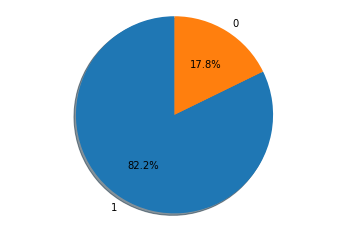

In [ ]:
createGraph(Df_dataset)

### Data preprocessing
#### The data set had a huge bias 82.2% , 17.8%. Using a statiscal approach we came up with a solution.

In [ ]:
def UpdateTheRows(meanrate,meanpositive,df_up,deplist):    
    
    indexcolnumbers = df_up['Index'].tolist()
    count = 0  
    
    for index in indexcolnumbers:       
        
        
        #need to change only in 1 having rows
        if(df_up.iloc[index]['Recommended IND'] == 1):            
            
            #get the respective row depname rating positive feedback
            rdepname = df_up.iloc[index]['Department Name']            
            
            if rdepname not in deplist:
                continue
            
            rrate = df_up.iloc[index]['Rating']
            rpositive = df_up.iloc[index]['Positive Feedback Count']

            #get the mean rate and postive count from the dictionary
            mrate = meanrate[rdepname]
            mpositive = meanpositive[rdepname]              
            
            
            #if the rate and positive feedbacks are not in the expected mean change it to 0
            if(rrate < mrate and rpositive <=  mpositive ):
                
                count = count + 1                
                df_up.at[index,'Recommended IND']= 0
             
            
    print('No of Rows Changed : ',str(count))
    
    return df_up

In [ ]:
#now get the avaerage mean of rate for each dep

#get the unique names of all the departments
def Create_Mean_And_Update_Class_field(df):
    
    
    Df_depnames = df.loc[ df['Recommended IND'] == 1  ][['Index','Department Name','Rating','Positive Feedback Count']]
    
    deplist = ['Trend','Intimate', 'Dresses', 'Tops', 'Bottoms', 'Jackets']       
    
    #intialize all the means 0 to ,otherwise when a keyword not in dictionary try access it gives an error
    
    depcountdict = {depname:0 for depname in deplist}
    depmeanrate = {depname:0 for depname in deplist}  # dept mean rate
    depmeanpositive = {depname:0 for depname in deplist}
    
    
    #get the len of rows for each department
    for eachdep in deplist[1:]:
        
        #get the rows of each department
        Df_depsingle = Df_depnames.loc[Df_depnames['Department Name'] == eachdep]

        #get the count of rows
        dfcount = Df_depsingle.groupby(['Department Name'] ).size()
        rowcount = dfcount[0]

        #get the average mean of rate
        sum_rate = sum(Df_depsingle['Rating'].tolist()) / rowcount
        depmeanrate[eachdep] = int(round(sum_rate, 0))

        #get the average mean of prositive feedback
        sum_positive = sum(Df_depsingle['Positive Feedback Count'].tolist()) / rowcount
        depmeanpositive[eachdep] = int(round(sum_positive, 0))
        
    print('Department list ',deplist)
    print('Mean Rate of Each Department ',depmeanrate)
    print('Mean No of Positive Feedbacks',depmeanpositive)
    
    #update the class field
    print('Updating Rows Please wait......')
    Df = UpdateTheRows(depmeanrate,depmeanpositive,df,deplist)
    print('Successfully Completed..')
    return depmeanrate,depmeanpositive,Df

In [ ]:
output_frame = Create_Mean_And_Update_Class_field(Df_dataset)
Df_dataset_updated = output_frame[2]


Department list  ['Trend', 'Intimate', 'Dresses', 'Tops', 'Bottoms', 'Jackets']
Mean Rate of Each Department  {'Trend': 0, 'Intimate': 5, 'Dresses': 5, 'Tops': 5, 'Bottoms': 5, 'Jackets': 5}
Mean No of Positive Feedbacks {'Trend': 0, 'Intimate': 2, 'Dresses': 3, 'Tops': 2, 'Bottoms': 2, 'Jackets': 3}
Updating Rows Please wait......
No of Rows Changed :  4764
Successfully Completed..


### After the statistical approach
### the distribution reduced to 62% and 38%

total 1 23486
1s count :  14550  0s count :  8936


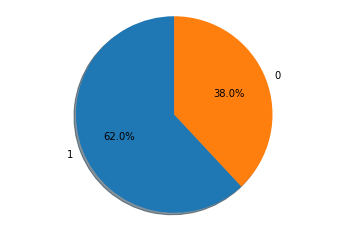

In [ ]:
createGraph(Df_dataset_updated)

In [ ]:
# Df_dataset.drop(Df_dataset.columns[0], axis = 1, inplace = True)
# If any data frame row contains any NaN value, it is droped here 
Df_dataset_new = Df_dataset_updated.dropna()

# Retrive top 500 results from the dataframe to reduce the execution time
Df_dataset_new_2 = Df_dataset_new.head(5000)
Df_dataset_new_2



,Index,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,1
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,4,General,Dresses,Dresses,0
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,1
...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,850,36,Pretty and sophisticated,This is a great top! i love the color of the p...,5,1,General Petite,Tops,Blouses,1
5978,5978,1086,29,"Very cute dress, but odd sizing",The pattern and fabric are very nice! i'm usua...,4,1,General,Dresses,Dresses,0
5979,5979,873,51,Great too,This is a perfect casual too to pair with jns ...,5,0,General,Tops,Knits,1
5980,5980,839,44,Got the last one !,I bought this at my local retailer store. i bo...,5,0,General,Tops,Blouses,1


total 1 19662
1s count :  12124  0s count :  7538


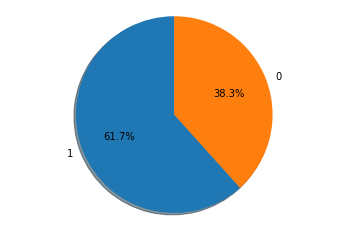

In [ ]:
# After droping the rows which contain NaN values
# createGraph(Df_dataset_new)
createGraph(Df_dataset_new)


### Selected 5000 data rows distribution

total 1 5000
1s count :  3041  0s count :  1959


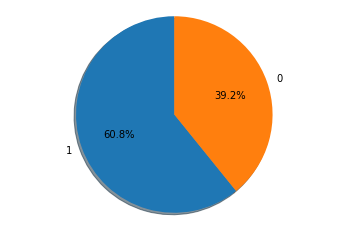

In [ ]:
createGraph(Df_dataset_new_2)

### Apply the Tokenization, Normalization, stemming, Lemmatization for the tokens in order to reduce the term vocabulary (feature selection)

In [ ]:
from nltk.corpus import stopwords

def special_character_remove(word):
    
    checkword =list(word) #make list with inserted word
    
    correct = []         #to collect the correct words without special characters
    
    for i in range(len(checkword)):
        
        if checkword[i] not in ["!","@","#","$","%","^","&","*","(",")","~","`","-","_","=","+","[","]","{","}",";",":","'",'""',"?","/",">","<",".",",", "\""]:
            correct.append(checkword[i])      
    
    ##then join the correct letters using join operator to return as string
    
    return "".join(correct)


def caseFolding(word):
    return word.lower()

# ##removing stop words
# from nltk.corpus import stopwords

def removeStopWords(wordstopword):
    stopwordlits = list(stopwords.words('english'))
    if(wordstopword in stopwordlits):
        return True
    return False

In [ ]:
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
import nltk

# Porter Stemmer Object
ps = PorterStemmer()

# Lemmetization Object
lemmatizer = WordNetLemmatizer()

# Review text retrivel from the data frame
reviewTextList = Df_dataset_new_2['Review Text'].tolist()

# Review Index ID retrivel from the data frame
idList = Df_dataset_new_2['Index'].tolist()

bagOfWords = []
bagOfWordsDic = {}

# Bag of words generation
for (review, id) in zip(reviewTextList, idList):

    # Initializing inner loop, which contains words of a paticular review text sentences
    wordList = []
    # Check whether the review text for the given Index ID is true or false
    # Process will be continued if it is False
   
    if pd.isnull(review) == False:
        # Split review text paragraphs into sentences
    
        sentences = review.split('.')
        for sentence in sentences:
            # Split sentences in to words
            words = sentence.split() 

            for word in words:
                
#                 tokenizedWord = nm.special_character_remove(word).lower()
    
                for tokenizedWord in nltk.word_tokenize(word):
                    
                    # special method to remove unwanted characters
                    tokenizedWord = special_character_remove(tokenizedWord)
                
                    try:

                        # It checks whether the tokenizedWord is a null value, is an numeric value, and also belongs to the stopwords list
                        # If all those conditions are true, then the word not be passed to the bag of words

                        if tokenizedWord != '' and not tokenizedWord.isnumeric() and tokenizedWord not in stopwords.words('english'):
                            # TODO: Discuss which stemming algorithm will be used. Check whether the stemmed word is null or not
                            
                            lemmetizedWord = lemmatizer.lemmatize(tokenizedWord)
                            stemmedWord = ps.stem(lemmetizedWord)
                            
                            # Check whether the tokenizedWord is null or not
                            # Process is continued if the tikenizedWord is not null
                            # If the stemmedWord gets a null value, it will be thrown as an exception and from the exception statement,
                            # it will continue the remaining words loop

                            if stemmedWord not in wordList and len(stemmedWord) > 1:
                                wordList.append(stemmedWord)

                    except Exception as e:
                        continue
        # Add the wordlist of one document(review text) in to the bag of words list        
        bagOfWords.append(wordList)

        # Dictionary which contains the term and document id for future use
        bagOfWordsDic[id] = wordList

    


## Vectorization

In [ ]:
import pandas as pd
import math as m

def create_Frequency_Term_Document_incidence_matrix(worddict):
    #get the unique words to a list    
    allbagofwords = []
    
    #number of documents = rows
    noofdoc =0
    
    #to save tf weight
    tfweight = {}
    
    
    
    #to save document frequency
    dfreq = [] 
    
    for mainlist in worddict.values():
        
        #update the number of docs
        noofdoc =  noofdoc + 1
        
        for sublist in mainlist:
            if(sublist not in allbagofwords):
                allbagofwords.append(sublist)
       
    #get the doclist
    doclist = list(worddict.keys())
    
    #sort the doclist
    doclist.sort()
    
    #initialize the final dict which needs to return
    finaldict = {}     
   
    #make a list with all zeros which will later use in the below for loop
    intialwordlist = [0 for i in allbagofwords ]        
    
    dfreq =  intialwordlist.copy() 
        
    #read each word from the worddict
    for doc,sentence in worddict.items():
        
        #initialize all the terms with '0'        
        finaldict[doc] = intialwordlist.copy()
        tfweight[doc] = intialwordlist.copy()        
        
        temp = sentence
        
        #update the relavant word count in each doc
        for eachword in sentence:                
            
            #count of each word in the given row
            countofword =  temp.count(eachword) 
            
            #if count == 0 when duplicate word removed from temp
            if(countofword == 0 ):                
                continue                
               
            #tf weight of term                 
            tf = 1 + m.log(countofword)             
            
            #get the index of the word which needs to be updates
            indexofword = allbagofwords.index(eachword)
            
            #update the  count of word all  document
            dfreq[indexofword] =  dfreq[indexofword] +  countofword
            
            #update the frequency dictioanry
            finaldict[doc][indexofword] =  countofword
            
            #update the term frequency weight dictionary
            tfweight[doc][indexofword] =  tf
            
            #remove the duplicate word to optimize the algorithm
            temp =  list(filter((eachword).__ne__, temp))
    
    
    dfweight = {allbagofwords[index]: m.log(dfreq[index]) for index in range(len(dfreq)) }    
    
     
    df_frequency = pd.DataFrame.from_dict(finaldict,orient ='index',columns = allbagofwords)  
    
    df_tfweight = pd.DataFrame.from_dict(tfweight,orient ='index',columns = allbagofwords)  
    
    df_dfweight =  pd.DataFrame.from_dict(dfweight,orient ='index')  
    
    return df_frequency,df_tfweight,df_dfweight

In [ ]:
output = create_Frequency_Term_Document_incidence_matrix(bagOfWordsDic)
print('==================Term-document count matrices  =============================\n')
print(output[0])
print('\n==================Log-frequency weighting ===================================\n')
print(output[1])
print('\n==================Idf weight For Each Term ==================================\n ')
print(output[2])

==================Term-document count matrices  =============================

      high  hope  dress  realli  want  work  initi  order  petit  small  ...  \
2        1     1      1       1     1     1      1      1      1      1  ...   
3        0     0      0       0     0     0      0      0      0      0  ...   
4        0     0      0       0     0     0      0      0      0      0  ...   
5        0     0      1       0     0     1      0      0      1      1  ...   
6        0     0      0       1     0     0      0      0      1      0  ...   
...    ...   ...    ...     ...   ...   ...    ...    ...    ...    ...  ...   
5977     0     0      0       0     0     0      0      0      1      0  ...   
5978     0     0      1       0     0     0      0      0      0      1  ...   
5979     0     0      0       0     0     0      0      0      0      0  ...   
5980     0     0      1       0     0     1      0      0      1      1  ...   
5982     0     0      0       0     0    

### TF-IDF Calculation

In [ ]:
import pandas as pd
import math as m
from sklearn.feature_extraction.text import TfidfVectorizer

wordSentences = []

# Get the sentences list which has been divided in to tokens
# Then joining those token create the sentences which will be used to create TF-IDF vector and assign them to
# - a new list called wordSentences
for i in range(0, len(bagOfWords)):
    wordSentences.append(' '.join(bagOfWords[i]))
    
def calculateTFIDF(wordlist):
    
    #Calculate the normalization vector for each term
    vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', norm='l2')
    vectors = vectorizer.fit_transform(wordlist)
    features = vectorizer.get_feature_names()

    dense = vectors.todense()
    denseList = dense.tolist()
    #calculates the TF and IDF 
    df = pd.DataFrame(denseList, columns = features)
    
    return df



In [ ]:
calculateTFIDF(wordSentences)

,00p,00p0rxxsx,02x,0p,0petit,0r,0x,10,100105lb,100lb,...,zermatt,zero,zig,zillion,zip,zipepr,zipper,zone,zoom,ã¼ber
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.182898,0.0,0.161753,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.234136,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


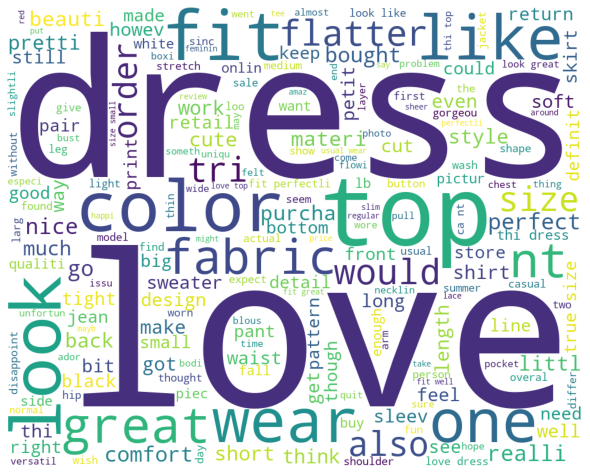

In [ ]:
# Word Representation based on the word frequency in the corpus.
# Wordcloud format

from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import pandas as pd 

wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords ='english', 
                min_font_size = 10).generate(' '.join(wordSentences))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Get TF-IDF output and get the necessary class column (Label Column)

In [ ]:
# Assign TF-IDF vector taken from the method
TfIdfOutput = calculateTFIDF(wordSentences)

# Retrived the data from the class column of the dataframe which we are going to predict
# labeledColumnValues
labeledColumnValues = Df_dataset_new_2['Recommended IND'].head(5000)




### Separate the datasets as Train and Test datasets

In [ ]:
# Data Splitting into testing and training sets

from sklearn.model_selection import train_test_split

# Split dataset into taining and testing (X and Y axis prospective)
X_train, X_test, Y_train, Y_test = train_test_split(TfIdfOutput, labeledColumnValues, test_size = 0.30, random_state = 0)

### K-nearest neighbors algorithm

[[432 166]
 [431 471]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.50      0.72      0.59       598
           1       0.74      0.52      0.61       902

    accuracy                           0.60      1500
   macro avg       0.62      0.62      0.60      1500
weighted avg       0.64      0.60      0.60      1500

Accuracy Score: 0.602


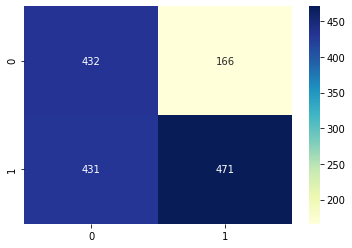

In [ ]:
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# KNeighborsClassifier object intializing
knn_classification_obj = KNeighborsClassifier(n_neighbors = 2)

# fit the model using training data sets for X and Y (Feature value and class value/label value)
knn_classification_obj.fit(X_train, Y_train)

# predict using test data (feature/attribute test data)
clf_prediction = knn_classification_obj.predict(X_test)

# Confusion Matrix
print(confusion_matrix(Y_test, clf_prediction))

print(sb.heatmap(confusion_matrix(Y_test, clf_prediction), annot=True, fmt='d', cmap='YlGnBu'))

# Classification Report
print(classification_report(Y_test,clf_prediction))

# Accuracy Score
print('Accuracy Score: {}'.format(accuracy_score(Y_test, clf_prediction)))


### Finding the best K value for KNN

In [ ]:
# Calculate the erros for K values to identify the best one
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

1/40 executed
2/40 executed
3/40 executed
4/40 executed
5/40 executed
6/40 executed
7/40 executed
8/40 executed
9/40 executed
10/40 executed
11/40 executed
12/40 executed
13/40 executed
14/40 executed
15/40 executed
16/40 executed
17/40 executed
18/40 executed
19/40 executed
20/40 executed
21/40 executed
22/40 executed
23/40 executed
24/40 executed
25/40 executed
26/40 executed
27/40 executed
28/40 executed
29/40 executed
30/40 executed
31/40 executed
32/40 executed
33/40 executed
34/40 executed
35/40 executed
36/40 executed
37/40 executed
38/40 executed
39/40 executed


In [ ]:
print(error)

[0.36866666666666664, 0.398, 0.32466666666666666, 0.3466666666666667, 0.318, 0.3253333333333333, 0.30933333333333335, 0.30266666666666664, 0.28733333333333333, 0.2926666666666667, 0.2946666666666667, 0.2846666666666667, 0.288, 0.2886666666666667, 0.2866666666666667, 0.2793333333333333, 0.276, 0.268, 0.2733333333333333, 0.256, 0.26666666666666666, 0.26, 0.27, 0.25733333333333336, 0.2653333333333333, 0.26266666666666666, 0.2693333333333333, 0.25933333333333336, 0.27666666666666667, 0.26266666666666666, 0.276, 0.266, 0.27266666666666667, 0.264, 0.2793333333333333, 0.266, 0.2733333333333333, 0.25533333333333336, 0.272]


Text(0, 0.5, 'Mean Error')

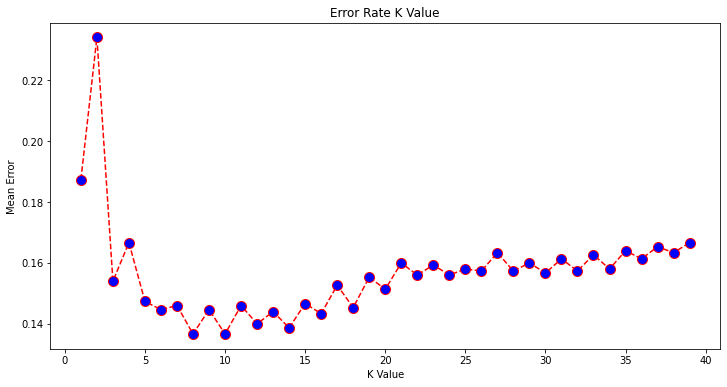

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(range(1,40),error,color = 'red',linestyle = 'dashed',marker = 'o',markerfacecolor = 'blue',markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Using the plot we identify the stable area and pick the optimum K at the beginning of the stable zone

### KNN for K = 20

[[317 281]
 [103 799]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.75      0.53      0.62       598
           1       0.74      0.89      0.81       902

    accuracy                           0.74      1500
   macro avg       0.75      0.71      0.71      1500
weighted avg       0.75      0.74      0.73      1500

Accuracy Score: 0.744


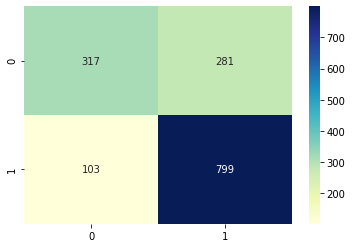

In [ ]:

import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# KNeighborsClassifier object intializing
knn_classification_obj = KNeighborsClassifier(n_neighbors = 20)

# fit the model using training data sets for X and Y (Feature value and class value/label value)
knn_classification_obj.fit(X_train, Y_train)

# predict using test data (feature/attribute test data)
clf_prediction = knn_classification_obj.predict(X_test)

# Confusion Matrix
print(confusion_matrix(Y_test, clf_prediction))

print(sb.heatmap(confusion_matrix(Y_test, clf_prediction), annot=True, fmt='d', cmap='YlGnBu'))


# Classification Report
print(classification_report(Y_test,clf_prediction))

# Accuracy Score
print('Accuracy Score: {}'.format(accuracy_score(Y_test, clf_prediction)))

### Naive Bayes algorithm

[[178 420]
 [ 23 879]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.89      0.30      0.45       598
           1       0.68      0.97      0.80       902

    accuracy                           0.70      1500
   macro avg       0.78      0.64      0.62      1500
weighted avg       0.76      0.70      0.66      1500

Accuracy Score: 0.7046666666666667


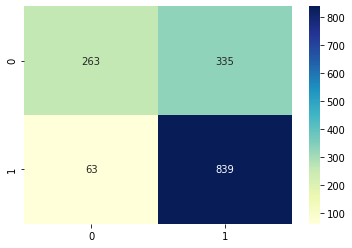

In [ ]:
import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Naive bayes (MultinomialNB) object intializing
nb_classification_obj = MultinomialNB()

# fit the model using training data sets for X and Y (Feature value and class value/label value)
nb_classification_obj.fit(X_train, Y_train)

# predict using test data (feature/attribute test data)
nb_prediction = nb_classification_obj.predict(X_test)

# Confusion Matrix
print(confusion_matrix(Y_test, nb_prediction))

print(sb.heatmap(confusion_matrix(Y_test, clf_prediction), annot=True, fmt='d', cmap='YlGnBu'))

# Classification Report
print(classification_report(Y_test, nb_prediction))

# Accuracy Score
print('Accuracy Score: {}'.format(accuracy_score(Y_test, nb_prediction)))

### SVM - Support Vector Machine

[[358 240]
 [105 797]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.77      0.60      0.67       598
           1       0.77      0.88      0.82       902

    accuracy                           0.77      1500
   macro avg       0.77      0.74      0.75      1500
weighted avg       0.77      0.77      0.76      1500

Accuracy Score: 0.77


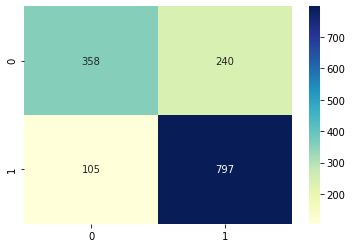

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# SVM object intializing
svm_classification_obj = svm.SVC()

# fit the model using training data sets for X and Y (Feature value and class value/label value)
svm_classification_obj.fit(X_train, Y_train)

# predict using test data (feature/attribute test data)
svm_prediction = svm_classification_obj.predict(X_test)

# Confusion Matrix
print(confusion_matrix(Y_test, svm_prediction))

print(sb.heatmap(confusion_matrix(Y_test, svm_prediction), annot=True, fmt='d', cmap='YlGnBu'))


# Classification Report
print(classification_report(Y_test,svm_prediction))

# Accuracy Score
print('Accuracy Score: {}'.format(accuracy_score(Y_test, svm_prediction)))